# **Sentimen Analisis Review APK Play Store AxisNet**

# **Import Library**

In [2]:
!pip install google-play-scrapper

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import requests
import json
import re
import string
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from io import StringIO
from collections  import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU, SpatialDropout1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seraf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scapping Dataset

In [5]:
# scrapreview = reviews_all(
#     'com.axis.net',
#     lang='id',
#     country='id',
#     sort=Sort.MOST_RELEVANT,
#     count=1000
# )

In [6]:
# import csv

# with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Review'])
#     for review in scrapreview:
#         writer.writerow([review['content']])

# Loading Dataset


In [ ]:
# app_reviews_df = pd.DataFrame(scrapreview)
# app_reviews_df.shape
# app_reviews_df.head()
# app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')

In [8]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9595fb2b-26b6-493e-9799-e5130703396d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya di perbarui makin jelek aja, harg...",1,29,9.25.0,2025-10-20 07:46:30,"Hi Kak, mohon maaf ya atas kendalanya. Yuk hub...",2025-10-20 08:01:29,9.25.0
1,4668f5cc-3ac5-4a48-a437-692b7bbea4e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolonglah penyakit ilang ilangan jaringan nya ...,4,91,9.25.0,2025-10-21 00:02:03,"Hi Kak, terima kasih sudah menggunakan AXISnet...",2025-10-21 00:00:41,9.25.0
2,311003cb-73a8-40bd-bcef-fa12d066caa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udh ga bisa dihitung berapa lama pakai axis,dr...",5,458,9.25.0,2025-10-19 22:06:00,"Hi Kak, terima kasih atas kepercayaannya untuk...",2025-10-20 00:01:39,9.25.0
3,060bfeb4-6af2-417c-902b-c9908f022616,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon maaf sebelumnya saya ingin komplain masa...,1,341,9.24.0,2025-09-30 20:58:22,"Hi, maaf atas kendalanya. Ikuti langkah beriku...",2023-03-13 13:28:49,9.24.0
4,d3724484-c59c-4aa9-8176-20f0fcfeaca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"so sorry axis,makin kesini Makin banyak kendal...",2,45,9.25.0,2025-10-19 06:35:23,"Hi Kak, mohon maaf untuk kendala yang Kakak al...",2025-10-19 08:01:44,9.25.0


In [9]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              112500 non-null  object
 1   userName              112500 non-null  object
 2   userImage             112500 non-null  object
 3   content               112500 non-null  object
 4   score                 112500 non-null  int64 
 5   thumbsUpCount         112500 non-null  int64 
 6   reviewCreatedVersion  88452 non-null   object
 7   at                    112500 non-null  object
 8   replyContent          85585 non-null   object
 9   repliedAt             85585 non-null   object
 10  appVersion            88452 non-null   object
dtypes: int64(2), object(9)
memory usage: 9.4+ MB


In [10]:
clean_df = app_reviews_df.dropna()

In [11]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9595fb2b-26b6-493e-9799-e5130703396d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya di perbarui makin jelek aja, harg...",1,29,9.25.0,2025-10-20 07:46:30,"Hi Kak, mohon maaf ya atas kendalanya. Yuk hub...",2025-10-20 08:01:29,9.25.0
1,4668f5cc-3ac5-4a48-a437-692b7bbea4e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolonglah penyakit ilang ilangan jaringan nya ...,4,91,9.25.0,2025-10-21 00:02:03,"Hi Kak, terima kasih sudah menggunakan AXISnet...",2025-10-21 00:00:41,9.25.0
2,311003cb-73a8-40bd-bcef-fa12d066caa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udh ga bisa dihitung berapa lama pakai axis,dr...",5,458,9.25.0,2025-10-19 22:06:00,"Hi Kak, terima kasih atas kepercayaannya untuk...",2025-10-20 00:01:39,9.25.0
3,060bfeb4-6af2-417c-902b-c9908f022616,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon maaf sebelumnya saya ingin komplain masa...,1,341,9.24.0,2025-09-30 20:58:22,"Hi, maaf atas kendalanya. Ikuti langkah beriku...",2023-03-13 13:28:49,9.24.0
4,d3724484-c59c-4aa9-8176-20f0fcfeaca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"so sorry axis,makin kesini Makin banyak kendal...",2,45,9.25.0,2025-10-19 06:35:23,"Hi Kak, mohon maaf untuk kendala yang Kakak al...",2025-10-19 08:01:44,9.25.0


In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68449 entries, 0 to 112498
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              68449 non-null  object
 1   userName              68449 non-null  object
 2   userImage             68449 non-null  object
 3   content               68449 non-null  object
 4   score                 68449 non-null  int64 
 5   thumbsUpCount         68449 non-null  int64 
 6   reviewCreatedVersion  68449 non-null  object
 7   at                    68449 non-null  object
 8   replyContent          68449 non-null  object
 9   repliedAt             68449 non-null  object
 10  appVersion            68449 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.3+ MB


In [13]:
clean_df = clean_df.drop_duplicates()

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

print(jumlah_kolom_setelah_hapus_duplikat)
print(jumlah_ulasan_setelah_hapus_duplikat)

11
68449


## Preprocessing

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    text = re.sub(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002700-\U000027BF"
        "\U0001F900-\U0001F9FF"
        "\U00002600-\U000026FF"
        "\U00002B00-\U00002BFF"
        "]+",
        '', text)
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
txt_files = ['slang_general.txt']

slangwords = {}

for file in txt_files:
    try:
        with open(file, 'r', encoding='utf-8') as f:
            data = f.read()
            # ubah string JSON di file menjadi dictionary
            slang_data = json.loads(data)
            # gabungkan ke slang_dict
            slangwords.update(slang_data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [16]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9595fb2b-26b6-493e-9799-e5130703396d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya di perbarui makin jelek aja, harg...",1,29,9.25.0,2025-10-20 07:46:30,"Hi Kak, mohon maaf ya atas kendalanya. Yuk hub...",2025-10-20 08:01:29,9.25.0
1,4668f5cc-3ac5-4a48-a437-692b7bbea4e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolonglah penyakit ilang ilangan jaringan nya ...,4,91,9.25.0,2025-10-21 00:02:03,"Hi Kak, terima kasih sudah menggunakan AXISnet...",2025-10-21 00:00:41,9.25.0
2,311003cb-73a8-40bd-bcef-fa12d066caa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udh ga bisa dihitung berapa lama pakai axis,dr...",5,458,9.25.0,2025-10-19 22:06:00,"Hi Kak, terima kasih atas kepercayaannya untuk...",2025-10-20 00:01:39,9.25.0
3,060bfeb4-6af2-417c-902b-c9908f022616,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon maaf sebelumnya saya ingin komplain masa...,1,341,9.24.0,2025-09-30 20:58:22,"Hi, maaf atas kendalanya. Ikuti langkah beriku...",2023-03-13 13:28:49,9.24.0
4,d3724484-c59c-4aa9-8176-20f0fcfeaca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"so sorry axis,makin kesini Makin banyak kendal...",2,45,9.25.0,2025-10-19 06:35:23,"Hi Kak, mohon maaf untuk kendala yang Kakak al...",2025-10-19 08:01:44,9.25.0
...,...,...,...,...,...,...,...,...,...,...,...
112490,f3c5cafb-807b-4a55-a887-28fc3493bf9d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kuota hilang gajelas penggunaan,, makin kesini...",1,0,8.1.0,2023-12-20 00:23:45,"Hi Kak, mohon maaf ya kalau ada yang bikin ga ...",2023-12-20 02:02:46,8.1.0
112491,9d0cd492-4bd1-4242-839b-f34b10c2cc04,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Eror terus tapi ga di perbaiki ini gimana mau ...,1,0,9.4.0,2023-10-05 05:46:41,"Hi Riza, mohon maaf ya atas ketidaknyamanan ya...",2023-02-09 19:58:28,9.4.0
112495,d48b7c09-e0a2-41e3-a95d-1a88f7a97160,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maakin hari makin lelet aja jaringannya padaha...,1,0,9.15.0,2024-10-23 21:11:10,"Hi Kak, maaf ya, agar dapat dibantu cek lebih ...",2024-10-23 22:02:58,9.15.0
112497,1b922292-3f4e-4224-9c39-d670fbfd93c6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ko paket ny nga bisa di pake sih setelah di be...,1,0,9.6.0,2023-12-20 23:56:48,"Hi Kak, maaf ya, agar dapat dibantu cek lebih ...",2023-12-21 00:04:48,9.6.0


In [17]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(word_tokenize)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [18]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,9595fb2b-26b6-493e-9799-e5130703396d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya di perbarui makin jelek aja, harg...",1,29,9.25.0,2025-10-20 07:46:30,"Hi Kak, mohon maaf ya atas kendalanya. Yuk hub...",2025-10-20 08:01:29,9.25.0,aplikasi nya di perbarui makin jelek aja harga...,aplikasi nya di perbarui makin jelek aja harga...,aplikasi nya di perbarui makin jelek saja harg...,"[aplikasi, nya, di, perbarui, makin, jelek, sa...","[aplikasi, perbarui, jelek, harganya, mahal, u...",aplikasi perbarui jelek harganya mahal uda git...
1,4668f5cc-3ac5-4a48-a437-692b7bbea4e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolonglah penyakit ilang ilangan jaringan nya ...,4,91,9.25.0,2025-10-21 00:02:03,"Hi Kak, terima kasih sudah menggunakan AXISnet...",2025-10-21 00:00:41,9.25.0,tolonglah penyakit ilang ilangan jaringan nya ...,tolonglah penyakit ilang ilangan jaringan nya ...,tolonglah penyakit hilang ilangan jaringan nya...,"[tolonglah, penyakit, hilang, ilangan, jaringa...","[tolonglah, penyakit, hilang, ilangan, jaringa...",tolonglah penyakit hilang ilangan jaringan ben...
2,311003cb-73a8-40bd-bcef-fa12d066caa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udh ga bisa dihitung berapa lama pakai axis,dr...",5,458,9.25.0,2025-10-19 22:06:00,"Hi Kak, terima kasih atas kepercayaannya untuk...",2025-10-20 00:01:39,9.25.0,Udh ga bisa dihitung berapa lama pakai axisdri...,udh ga bisa dihitung berapa lama pakai axisdri...,udh ga bisa dihitung berapa lama pakai axisdri...,"[udh, ga, bisa, dihitung, berapa, lama, pakai,...","[udh, dihitung, pakai, axisdri, jaman, sekolah...",udh dihitung pakai axisdri jaman sekolah smk s...
3,060bfeb4-6af2-417c-902b-c9908f022616,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon maaf sebelumnya saya ingin komplain masa...,1,341,9.24.0,2025-09-30 20:58:22,"Hi, maaf atas kendalanya. Ikuti langkah beriku...",2023-03-13 13:28:49,9.24.0,Mohon maaf sebelumnya saya ingin komplain masa...,mohon maaf sebelumnya saya ingin komplain masa...,mohon maaf sebelumnya saya ingin komplain masa...,"[mohon, maaf, sebelumnya, saya, ingin, komplai...","[mohon, maaf, komplain, sinyal, sedikitminim, ...",mohon maaf komplain sinyal sedikitminim sekita...
4,d3724484-c59c-4aa9-8176-20f0fcfeaca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"so sorry axis,makin kesini Makin banyak kendal...",2,45,9.25.0,2025-10-19 06:35:23,"Hi Kak, mohon maaf untuk kendala yang Kakak al...",2025-10-19 08:01:44,9.25.0,so sorry axismakin kesini Makin banyak kendala...,so sorry axismakin kesini makin banyak kendala...,so maaf axismakin kesini makin banyak kendalan...,"[so, maaf, axismakin, kesini, makin, banyak, k...","[maaf, axismakin, kesini, kendalanya, sekeluar...",maaf axismakin kesini kendalanya sekeluarga pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112490,f3c5cafb-807b-4a55-a887-28fc3493bf9d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kuota hilang gajelas penggunaan,, makin kesini...",1,0,8.1.0,2023-12-20 00:23:45,"Hi Kak, mohon maaf ya kalau ada yang bikin ga ...",2023-12-20 02:02:46,8.1.0,kuota hilang gajelas penggunaan makin kesini m...,kuota hilang gajelas penggunaan makin kesini m...,kuota hilang gajelas penggunaan makin kesini m...,"[kuota, hilang, gajelas, penggunaan, makin, ke...","[kuota, hilang, gajelas, penggunaan, kesini]",kuota hilang gajelas penggunaan kesini
112491,9d0cd492-4bd1-4242-839b-f34b10c2cc04,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Eror terus tapi ga di perbaiki ini gimana mau ...,1,0,9.4.0,2023-10-05 05:46:41,"Hi Riza, mohon maaf ya atas ketidaknyamanan ya...",2023-02-09 19:58:28,9.4.0,Eror terus tapi ga di perbaiki ini g

## Pelabelan

In [19]:
print(clean_df['score'].value_counts())

score
1    38274
5    10065
2     8676
3     7258
4     4176
Name: count, dtype: int64


In [ ]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    counts = Counter(text)

    for word, freq in counts.items():
        if word in lexicon_positive:
            score += lexicon_positive[word] * min(freq, 3)
        if word in lexicon_negative:
            score += lexicon_negative[word] * min(freq, 3)

    # Rule-based override
    if any(w in ["bug","burik","ampas","lemot","error"] for w in text):
        polarity = 'negative'
    else:
        if score > 0:
            polarity = 'positive'
        elif score < 0:
            polarity = 'negative'
        else:
            polarity = 'neutral'

    return score, polarity

In [22]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))

clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())

# def polarityLabel(score):
#     if score == 4 or score == 5:
#         return 'positive'
#     elif score == 1 or score == 2:
#         return 'negative'
#     elif score == 3:
#         return 'neutral'

# clean_df['polarity'] = clean_df['score'].apply(polarityLabel)

# clean_df['polarity'] = 'positif' if clean_df['score'] == 4 | 5 else 'negatif' if clean_df['score'] == 1 | 2 else 'netral'

polarity
negative    41164
positive    22405
neutral      4880
Name: count, dtype: int64


In [23]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,9595fb2b-26b6-493e-9799-e5130703396d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya di perbarui makin jelek aja, harg...",1,29,9.25.0,2025-10-20 07:46:30,"Hi Kak, mohon maaf ya atas kendalanya. Yuk hub...",2025-10-20 08:01:29,9.25.0,aplikasi nya di perbarui makin jelek aja harga...,aplikasi nya di perbarui makin jelek aja harga...,aplikasi nya di perbarui makin jelek saja harg...,"[aplikasi, nya, di, perbarui, makin, jelek, sa...","[aplikasi, perbarui, jelek, harganya, mahal, u...",aplikasi perbarui jelek harganya mahal uda git...,-23,negative
1,4668f5cc-3ac5-4a48-a437-692b7bbea4e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolonglah penyakit ilang ilangan jaringan nya ...,4,91,9.25.0,2025-10-21 00:02:03,"Hi Kak, terima kasih sudah menggunakan AXISnet...",2025-10-21 00:00:41,9.25.0,tolonglah penyakit ilang ilangan jaringan nya ...,tolonglah penyakit ilang ilangan jaringan nya ...,tolonglah penyakit hilang ilangan jaringan nya...,"[tolonglah, penyakit, hilang, ilangan, jaringa...","[tolonglah, penyakit, hilang, ilangan, jaringa...",tolonglah penyakit hilang ilangan jaringan ben...,4,positive
2,311003cb-73a8-40bd-bcef-fa12d066caa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udh ga bisa dihitung berapa lama pakai axis,dr...",5,458,9.25.0,2025-10-19 22:06:00,"Hi Kak, terima kasih atas kepercayaannya untuk...",2025-10-20 00:01:39,9.25.0,Udh ga bisa dihitung berapa lama pakai axisdri...,udh ga bisa dihitung berapa lama pakai axisdri...,udh ga bisa dihitung berapa lama pakai axisdri...,"[udh, ga, bisa, dihitung, berapa, lama, pakai,...","[udh, dihitung, pakai, axisdri, jaman, sekolah...",udh dihitung pakai axisdri jaman sekolah smk s...,-14,negative
3,060bfeb4-6af2-417c-902b-c9908f022616,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon maaf sebelumnya saya ingin komplain masa...,1,341,9.24.0,2025-09-30 20:58:22,"Hi, maaf atas kendalanya. Ikuti langkah beriku...",2023-03-13 13:28:49,9.24.0,Mohon maaf sebelumnya saya ingin komplain masa...,mohon maaf sebelumnya saya ingin komplain masa...,mohon maaf sebelumnya saya ingin komplain masa...,"[mohon, maaf, sebelumnya, saya, ingin, komplai...","[mohon, maaf, komplain, sinyal, sedikitminim, ...",mohon maaf komplain sinyal sedikitminim sekita...,-2,negative
4,d3724484-c59c-4aa9-8176-20f0fcfeaca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"so sorry axis,makin kesini Makin banyak kendal...",2,45,9.25.0,2025-10-19 06:35:23,"Hi Kak, mohon maaf untuk kendala yang Kakak al...",2025-10-19 08:01:44,9.25.0,so sorry axismakin kesini Makin banyak kendala...,so sorry axismakin kesini makin banyak kendala...,so maaf axismakin kesini makin banyak kendalan...,"[so, maaf, axismakin, kesini, makin, banyak, k...","[maaf, axismakin, kesini, kendalanya, sekeluar...",maaf axismakin kesini kendalanya sekeluarga pa...,3,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112490,f3c5cafb-807b-4a55-a887-28fc3493bf9d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kuota hilang gajelas penggunaan,, makin kesini...",1,0,8.1.0,2023-12-20 00:23:45,"Hi Kak, mohon maaf ya kalau ada yang bikin ga ...",2023-12-20 02:02:46,8.1.0,kuota hilang gajelas penggunaan makin kesini m...,kuota hilang gajelas penggunaan makin kesini m...,kuota hilang gajelas penggunaan makin kesini m...,"[kuota, hilang, gajelas, penggunaan, makin, ke...","[kuota, hilang, gajelas, penggunaan, kesini]",kuota hilang gajelas penggunaan kesini,-2,negative
112491,9d0cd492-4bd1-4242-839b-f34b10c2cc04,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Eror terus tapi ga di perbaiki ini gimana mau ...,1,0,9.4.0,2023-10-05 05:46:41,"Hi Riza, 

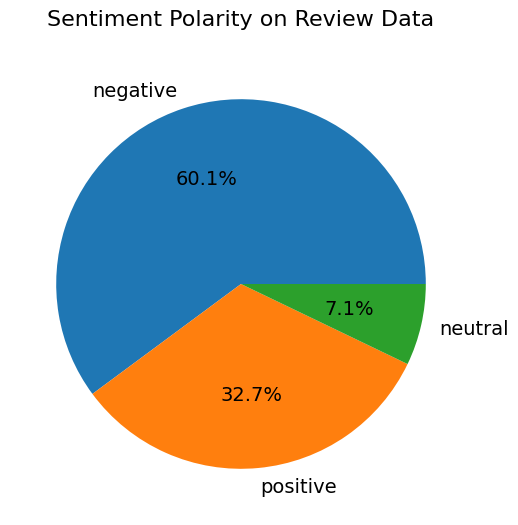

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

In [25]:
clean_df['polarity'].value_counts()

polarity
negative    41164
positive    22405
neutral      4880
Name: count, dtype: int64

In [26]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,9595fb2b-26b6-493e-9799-e5130703396d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya di perbarui makin jelek aja, harg...",1,29,9.25.0,2025-10-20 07:46:30,"Hi Kak, mohon maaf ya atas kendalanya. Yuk hub...",2025-10-20 08:01:29,9.25.0,aplikasi nya di perbarui makin jelek aja harga...,aplikasi nya di perbarui makin jelek aja harga...,aplikasi nya di perbarui makin jelek saja harg...,"[aplikasi, nya, di, perbarui, makin, jelek, sa...","[aplikasi, perbarui, jelek, harganya, mahal, u...",aplikasi perbarui jelek harganya mahal uda git...,-23,negative
1,4668f5cc-3ac5-4a48-a437-692b7bbea4e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolonglah penyakit ilang ilangan jaringan nya ...,4,91,9.25.0,2025-10-21 00:02:03,"Hi Kak, terima kasih sudah menggunakan AXISnet...",2025-10-21 00:00:41,9.25.0,tolonglah penyakit ilang ilangan jaringan nya ...,tolonglah penyakit ilang ilangan jaringan nya ...,tolonglah penyakit hilang ilangan jaringan nya...,"[tolonglah, penyakit, hilang, ilangan, jaringa...","[tolonglah, penyakit, hilang, ilangan, jaringa...",tolonglah penyakit hilang ilangan jaringan ben...,4,positive
2,311003cb-73a8-40bd-bcef-fa12d066caa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udh ga bisa dihitung berapa lama pakai axis,dr...",5,458,9.25.0,2025-10-19 22:06:00,"Hi Kak, terima kasih atas kepercayaannya untuk...",2025-10-20 00:01:39,9.25.0,Udh ga bisa dihitung berapa lama pakai axisdri...,udh ga bisa dihitung berapa lama pakai axisdri...,udh ga bisa dihitung berapa lama pakai axisdri...,"[udh, ga, bisa, dihitung, berapa, lama, pakai,...","[udh, dihitung, pakai, axisdri, jaman, sekolah...",udh dihitung pakai axisdri jaman sekolah smk s...,-14,negative
3,060bfeb4-6af2-417c-902b-c9908f022616,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon maaf sebelumnya saya ingin komplain masa...,1,341,9.24.0,2025-09-30 20:58:22,"Hi, maaf atas kendalanya. Ikuti langkah beriku...",2023-03-13 13:28:49,9.24.0,Mohon maaf sebelumnya saya ingin komplain masa...,mohon maaf sebelumnya saya ingin komplain masa...,mohon maaf sebelumnya saya ingin komplain masa...,"[mohon, maaf, sebelumnya, saya, ingin, komplai...","[mohon, maaf, komplain, sinyal, sedikitminim, ...",mohon maaf komplain sinyal sedikitminim sekita...,-2,negative
4,d3724484-c59c-4aa9-8176-20f0fcfeaca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"so sorry axis,makin kesini Makin banyak kendal...",2,45,9.25.0,2025-10-19 06:35:23,"Hi Kak, mohon maaf untuk kendala yang Kakak al...",2025-10-19 08:01:44,9.25.0,so sorry axismakin kesini Makin banyak kendala...,so sorry axismakin kesini makin banyak kendala...,so maaf axismakin kesini makin banyak kendalan...,"[so, maaf, axismakin, kesini, makin, banyak, k...","[maaf, axismakin, kesini, kendalanya, sekeluar...",maaf axismakin kesini kendalanya sekeluarga pa...,3,positive


#### Data Splitting

In [ ]:
# --- 1. Load Data ---
X = clean_df['text_akhir'].tolist()  # kolom teks yang sudah dibersihkan
y = clean_df['polarity'].tolist()    # kolom label

# --- 2. Encode Label ---
# Encode label (Ini bisa dilakukan sebelum split)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 3. Split Data Mentah  ---
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# --- 4. Tokenisasi ---
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# Latih (fit) tokenizer
tokenizer.fit_on_texts(X_train_text)

# Ubah (transform) data latih dan data uji
sequences_train = tokenizer.texts_to_sequences(X_train_text)
sequences_test = tokenizer.texts_to_sequences(X_test_text)

# --- 5. Padding ---
# Lakukan padding pada kedua set data
X_train = pad_sequences(sequences_train, maxlen=max_len, padding='post')
X_test = pad_sequences(sequences_test, maxlen=max_len, padding='post')

#### Skema 1
Menggunakan Bidirectional LSTM, Pembagian data 80% train / 20% test, dan Fitur Ekstraksi dengan Embedding

In [ ]:
# --- 1. Build Model ---
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.3),  # Regularisasi untuk Embedding
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),           # Regularisasi untuk LSTM/Dense
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# --- 2. Training ---
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    epochs=20,  # Ditingkatkan dari 5 ke 20
                    batch_size=64, 
                    validation_split=0.1, 
                    callbacks=[early_stop]) # Menambahkan callback

# --- 3. Evaluasi ---
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"BiLSTM - accuracy_train: {train_acc:.4f}")
print(f"BiLSTM - accuracy_test: {test_acc:.4f}")

# --- 4. Prediksi ---
y_pred_test_bilstm = np.argmax(model.predict(X_test), axis=1)

# (Opsional) Mengubah prediksi kembali ke label teks
# y_pred_labels = le.inverse_transform(y_pred_test_bilstm)
# print(y_pred_labels[:10])

c:\Users\seraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 58s 68ms/step - accuracy: 0.8455 - loss: 0.4064 - val_accuracy: 0.8908 - val_loss: 0.2928
Epoch 2/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.9180 - loss: 0.2253 - val_accuracy: 0.9012 - val_loss: 0.2603
Epoch 3/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 56s 73ms/step - accuracy: 0.9370 - loss: 0.1709 - val_accuracy: 0.9193 - val_loss: 0.2320
Epoch 4/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.9480 - loss: 0.1406 - val_accuracy: 0.9255 - val_loss: 0.2146
Epoch 5/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 62s 81ms/step - accuracy: 0.9569 - loss: 0.1143 - val_accuracy: 0.9235 - val_loss: 0.2507
Epoch 6/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.9626 - loss: 0.1000 - val_accuracy: 0.9249 - val_loss: 0.2348
Epoch 7/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.9668 - loss: 0.0878 - val_accuracy: 0.9275 - val_loss: 0.2556
BiLSTM - accuracy_train: 0.9596
BiLSTM - accuracy_test: 0.9291
428/428 ━━━━━━━━━━━━━━━━━━━

#### Skema 2
Menggunakan Bidirectional GRU, Pembagian data 80% train / 20% test, dan Fitur Ekstraksi dengan Embedding

In [31]:
# --- 1. Build Model ---
model_gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.3),  # Regularisasi untuk Embedding
    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.5),           # Regularisasi untuk GRU/Dense
    Dense(3, activation='softmax')
])

model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

# --- 2. Training ---
# Beri lebih banyak epoch, dan biarkan EarlyStopping yg menghentikan
# Ini akan memantau val_loss dan mengembalikan bobot model terbaik
early_stop_gru = EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           restore_best_weights=True)

history_gru = model_gru.fit(X_train, y_train, 
                    epochs=20,  
                    batch_size=64, 
                    validation_split=0.1, 
                    callbacks=[early_stop_gru]) 

# --- 3. Evaluasi ---
train_acc_gru = model_gru.evaluate(X_train, y_train, verbose=0)[1]
test_acc_gru = model_gru.evaluate(X_test, y_test, verbose=0)[1]
print(f"BiGRU - accuracy_train: {train_acc_gru:.4f}")
print(f"BiGRU - accuracy_test: {test_acc_gru:.4f}")

# --- 4. Prediksi ---
y_pred_test_bigru = np.argmax(model_gru.predict(X_test), axis=1)

# (Opsional) Mengubah prediksi kembali ke label teks
# y_pred_labels = le.inverse_transform(y_pred_test_bilstm)
# print(y_pred_labels[:10])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 69s 79ms/step - accuracy: 0.8461 - loss: 0.4030 - val_accuracy: 0.8976 - val_loss: 0.2788
Epoch 2/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 56s 73ms/step - accuracy: 0.9205 - loss: 0.2206 - val_accuracy: 0.9131 - val_loss: 0.2302
Epoch 3/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.9377 - loss: 0.1713 - val_accuracy: 0.9140 - val_loss: 0.2383
Epoch 4/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.9472 - loss: 0.1423 - val_accuracy: 0.9206 - val_loss: 0.2234
Epoch 5/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.9542 - loss: 0.1225 - val_accuracy: 0.9196 - val_loss: 0.2375
Epoch 6/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.9614 - loss: 0.1064 - val_accuracy: 0.9154 - val_loss: 0.2643
Epoch 7/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 57s 74ms/step - accuracy: 0.9651 - loss: 0.0973 - val_accuracy: 0.9213 - val_loss: 0.2598
BiGRU - accuracy_train: 0.9613
BiGRU - accuracy_test: 0.9253
428/428 ━━━━━━━━━━━━━━━━━━━━ 

#### Skema 3
Menggunakan BiLSTM, Pembagian data 80% train / 20% test, dan Fitur Ekstraksi dengan Word2Vec

In [36]:
from gensim.models import Word2Vec
# --- 1. Ekstraksi Fitur ---
vector_size = 128
tokenized_train_text = [text.split() for text in X_train_text]

# Latih Model Word2Vec
model_w2v = Word2Vec(sentences=tokenized_train_text,
                     vector_size=vector_size,
                     window=5,
                     min_count=2,
                     workers=4)

# Membuat Embedding Matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words + 1, vector_size))

for word, i in word_index.items():
    if i > max_words:
        continue
    if word in model_w2v.wv:
        embedding_matrix[i] = model_w2v.wv[word]

# --- 2. Build Model LSTM ---
model_w2v_bilstm = Sequential([
    Embedding(
        input_dim=max_words + 1,
        output_dim=vector_size,     
        input_length=max_len,
        weights=[embedding_matrix], 
        trainable=False 
    ),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(3, activation='softmax')
])

model_w2v_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_w2v_bilstm.summary()

# --- 3. Training ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_bilstm_w2v = model_w2v_bilstm.fit(X_train, y_train, 
                           epochs=20, 
                           batch_size=64, 
                           validation_split=0.1, 
                           callbacks=[early_stop])

# --- 4. Evaluasi ---
train_acc_bilstm_w2v = model_w2v_bilstm.evaluate(X_train, y_train, verbose=0)[1]
test_acc_bilstm_w2v = model_w2v_bilstm.evaluate(X_test, y_test, verbose=0)[1]
print(f"BiLSTM + Word2Vec - accuracy_train: {train_acc_bilstm_w2v:.4f}")
print(f"BiLSTM + Word2Vec - accuracy_test: {test_acc_bilstm_w2v:.4f}")

# --- 5. Prediksi ---
y_pred_test_bilstm_w2v = np.argmax(model_w2v_bilstm.predict(X_test), axis=1)



c:\Users\seraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_7             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,128 (4.88 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,280,128 (4.88 MB)

Epoch 1/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.7290 - loss: 0.6593 - val_accuracy: 0.7789 - val_loss: 0.5595
Epoch 2/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7874 - loss: 0.5458 - val_accuracy: 0.7936 - val_loss: 0.5177
Epoch 3/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.8039 - loss: 0.5097 - val_accuracy: 0.8214 - val_loss: 0.4777
Epoch 4/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.8136 - loss: 0.4853 - val_accuracy: 0.8272 - val_loss: 0.4642
Epoch 5/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8212 - loss: 0.4672 - val_accuracy: 0.8263 - val_loss: 0.4570
Epoch 6/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.8273 - loss: 0.4522 - val_accuracy: 0.8320 - val_loss: 0.4466
Epoch 7/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.8313 - loss: 0.4427 - val_accuracy: 0.8382 - val_loss: 0.4317
Epoch 8/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8382 - loss: 0.4300 - 

In [ ]:
def preprocess_pipeline(text):
    # 1. Cleaning
    text_clean = cleaningText(text)
    
    # 2. Case Folding
    text_casefolding = casefoldingText(text_clean)
    
    # 3. Normalisasi Slang
    text_slang = fix_slangwords(text_casefolding)
    
    # 4. Tokenizing
    text_tokens = word_tokenize(text_slang)
    
    # 5. Stopword Filtering
    text_filtered = filteringText(text_tokens)
    
    # 6. Gabungkan kembali ke string
    text_akhir = toSentence(text_filtered)
    
    return text_akhir

In [51]:
# 1. Buat beberapa contoh ulasan baru (teks mentah)
ulasan_baru = [
    "Favorit deh pokoknya, puas banget dapat paket gratis",
    "Biasa aja sih, fiturnya standar tidak ada yang spesial.",
    "PARAH! Update terbaru malah bikin lemot dan sering error!!",
    "Sangat mengecewakan, tidak sesuai ekspektasi.",
    "lumayan lah buat iseng-iseng",
    "KEREN! developernya responsif dan fiturnya nambah terus"
]

print("--- Memulai Proses Inferensi ---")


# 2. Buat fungsi untuk memproses dan memprediksi
def prediksi_sentimen(list_teks, model_to_use, tokenizer_to_use, label_encoder, max_seq_len):
    
    # Siapkan list untuk hasil
    hasil_prediksi = []

    for teks_mentah in list_teks:
        # 3. Bersihkan teks (HARUS SAMA PERSIS dengan preprocessing data latih)
        teks_bersih = preprocess_pipeline(teks_mentah)

        # 4. Ubah teks bersih menjadi sekuens angka
        sekuens = tokenizer_to_use.texts_to_sequences([teks_bersih])

        # 5. Lakukan Padding
        padded_sekuens = pad_sequences(sekuens, maxlen=max_seq_len, padding='post')

        # 6. Lakukan Prediksi
        prediksi_prob = model_to_use.predict(padded_sekuens)

        # 7. Ambil indeks kelas dengan probabilitas tertinggi
        prediksi_indeks = np.argmax(prediksi_prob, axis=1)[0]

        # 8. Ubah indeks kembali menjadi label teks
        prediksi_label = label_encoder.inverse_transform([prediksi_indeks])[0]
        
        hasil_prediksi.append((teks_mentah, prediksi_label))
    
    return hasil_prediksi

# 9. Jalankan fungsi inferensi
hasil = prediksi_sentimen(ulasan_baru, model, tokenizer, le, max_len)
hasil2 = prediksi_sentimen(ulasan_baru, model_gru, tokenizer, le, max_len)
hasil3 = prediksi_sentimen(ulasan_baru, model_w2v_bilstm, tokenizer, le, max_len)

# 10. Cetak output kategorikal (ini yang perlu Anda screenshot)
print("\n--- Hasil Prediksi Kategori Skema 1 ---")
for teks_asli, prediksi in hasil:
    print(f"Teks: '{teks_asli}'")
    print(f"Prediksi: {prediksi}")
    print("-" * 25)

print("\n--- Hasil Prediksi Kategori Skema 2 ---")
for teks_asli, prediksi in hasil2:
    print(f"Teks: '{teks_asli}'")
    print(f"Prediksi: {prediksi}")
    print("-" * 25)

print("\n--- Hasil Prediksi Kategori Skema 3 ---")
for teks_asli, prediksi in hasil3:
    print(f"Teks: '{teks_asli}'")
    print(f"Prediksi: {prediksi}")
    print("-" * 25)

--- Memulai Proses Inferensi ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

--- Hasil Prediksi Kategori Skema 1 ---
Teks: 'Favorit deh pokoknya, puas banget dapat paket gratis'
Prediksi: positive
-------------------------
Teks: 'Biasa aja sih, fiturnya standar tidak ada yang spesial.'
Prediksi: neutral
-------------------------
Teks: 'PARAH! Update terbaru